In [1]:
import os
import math
import numpy as np
import matplotlib.pyplot as plt

from os import listdir, makedirs
from os.path import isfile, join

In [2]:
key_words = ["boy", "girl", "bagel", "kernel", "porsche", "collapse"]
alphabet = "abcdefghijklmnopqrstuvwxyz"
text_length = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700]

letter_frequencies = {'a': 0.08167, 'b': 0.01492, 'c': 0.02782, 'd': 0.04253, 'e': 0.12702, 'f': 0.0228,
            'g': 0.02015, 'h': 0.06094, 'i': 0.06966, 'j': 0.00153, 'k': 0.00772, 'l': 0.04025,
            'm': 0.02406, 'n': 0.06749, 'o': 0.07507, 'p': 0.01929, 'q': 0.00095, 'r': 0.05987,
            's': 0.06327, 't': 0.09056, 'u': 0.02758, 'v': 0.00978, 'w': 0.0236, 'x': 0.0015, 
            'y': 0.01974, 'z': 0.00074}

# Encoding

In [3]:
def create_matrix(n, m, key_word):

    matrix = [["" for x in range(m)] for x in range(n)]

    for i in range(1, n):
        matrix[i][0] = key_word[i - 1]

    for j in range(0, m):
        matrix[0][j] = alphabet[j]

    for i in range(1, n):
        start_char = matrix[i][0]
        start_char_num = alphabet.index(start_char)

        for j in range(1, m - start_char_num):
            matrix[i][j] = alphabet[start_char_num + j]
        l = 0
        for j in range(m - start_char_num, m):
            matrix[i][j] = alphabet[l]
            l += 1

    return matrix

In [4]:
for row in create_matrix(len(key_words[0]) + 1, len(alphabet), key_words[0]):
    print(*row)

a b c d e f g h i j k l m n o p q r s t u v w x y z
b c d e f g h i j k l m n o p q r s t u v w x y z a
o p q r s t u v w x y z a b c d e f g h i j k l m n
y z a b c d e f g h i j k l m n o p q r s t u v w x


In [5]:
def create_key_word_line(seq, key_word):
    line = ""
    l = len(seq)
    k = 0
    m = len(key_word)
    for i in range(l):
        line += key_word[k]
        k += 1
        if k == m:
            k = 0
    return line

In [6]:
create_key_word_line("asldkjas aslkdjaslkdjas laskdjsaldkjsaldjk aslkdjsalkdjsaldkj alskdjaslkdjsal alskdjsalkdjsa", "boy")

'boyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboybo'

In [7]:
def encode_line(line, key_word_line, matrix, key_word):

    n = len(key_word) + 1
    m = len(matrix[0])
    l = len(line)

    encoded_line = ""

    for i in range(l):
        seq_char = line[i]
        help_char = key_word_line[i]

        if seq_char.isalpha():
            char_ind = alphabet.index(seq_char)
            help_ind = key_word.index(help_char) + 1
            encoded_line += matrix[help_ind][char_ind]
        else:
            encoded_line += seq_char

    return encoded_line


In [8]:
text = "i was drugged and left for dead in mexico - and all i got was this stupid t-shirt"
key_word = "boy"
key_word_line = create_key_word_line(text, key_word)
matrix = create_matrix(len(key_word) + 1, len(alphabet), key_word)
for x in matrix:
    print(*x)
print()
print(text)
print(encode_line(text, key_word_line, matrix, key_word))
print(key_word_line)

a b c d e f g h i j k l m n o p q r s t u v w x y z
b c d e f g h i j k l m n o p q r s t u v w x y z a
o p q r s t u v w x y z a b c d e f g h i j k l m n
y z a b c d e f g h i j k l m n o p q r s t u v w x

i was drugged and left for dead in mexico - and all i got was this stupid t-shirt
j ubg efshuce yor msdu dpf esye go kflgdc - yor bzj w hcr kyt riwq grvdge r-gfjfr
boyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboyboy


In [9]:
m = len(alphabet)

for length in text_length:
    for i in range(1, 11):
        for key_word in key_words:
            
            n = len(key_word)+1
            output_path = os.path.join("encoded_text", str(length), key_word, "lowercase_text (" + str(i) + ").txt")
            input_path = os.path.join("plain_text", "lowercase_text (" + str(i) + ").txt")
            
            text_input_wrapper = open(input_path, 'r')
            curr_text = str(text_input_wrapper.read())[:length]
            matrix = create_matrix(n, m, key_word)
            help_line = create_key_word_line(curr_text, key_word)
            encoded_line = encode_line(curr_text, help_line, matrix, key_word)
            if not os.path.exists(os.path.dirname(output_path)):
                makedirs(os.path.dirname(output_path))
            text_output_wrapper = open(output_path, 'w')
            text_output_wrapper.write(encoded_line)
    
            text_input_wrapper.close()
            text_output_wrapper.close()

print("Encoding finished!")

Encoding finished!


# Decoding

In [10]:
def find_deltas(text, l_gramm_length):
    
    dictionary = {}
    entries = {}
    deltas = {}
    global_deltas = []
    
    for i in range ((len(text) - l_gramm_length + 1)):
        curr_l_gramm = text[i:i+l_gramm_length]
        if (dictionary.get(curr_l_gramm) == None):
            dictionary[curr_l_gramm] = 1
            entries[curr_l_gramm] = [i]
            deltas[curr_l_gramm] = []
            
        else:
            dictionary[curr_l_gramm] += 1
            deltas[curr_l_gramm].append(i - entries[curr_l_gramm][-1])
            global_deltas.append(i - entries[curr_l_gramm][-1])
            entries[curr_l_gramm].append(i)
    return deltas

In [11]:
d = find_deltas("abcfhabcasdsadsagjhrpomvldjvbjhbskajskjsaqgabc", 3)
print(d)

{'abc': [5, 38], 'bcf': [], 'cfh': [], 'fha': [], 'hab': [], 'bca': [], 'cas': [], 'asd': [], 'sds': [], 'dsa': [3], 'sad': [], 'ads': [], 'sag': [], 'agj': [], 'gjh': [], 'jhr': [], 'hrp': [], 'rpo': [], 'pom': [], 'omv': [], 'mvl': [], 'vld': [], 'ldj': [], 'djv': [], 'jvb': [], 'vbj': [], 'bjh': [], 'jhb': [], 'hbs': [], 'bsk': [], 'ska': [], 'kaj': [], 'ajs': [], 'jsk': [], 'skj': [], 'kjs': [], 'jsa': [], 'saq': [], 'aqg': [], 'qga': [], 'gab': []}


In [12]:
def array_gcd(array):
    val = array[0]
    for i in range(len(array)):
        val = math.gcd(val, array[i])
    
    return val

In [13]:
def find_key_word_length(l_gramm_deltas):
    all_values = []
    for key in l_gramm_deltas:
        for i in range(len(l_gramm_deltas[key])):
            all_values.append(l_gramm_deltas[key][i])
    if all_values:
        return array_gcd(all_values)
    else:
        return -1

In [14]:
def find_letter (encoded_subline, keyword_length):
    
    frequency = {'a': 0, 'b': 0, 'c': 0, 'd': 0, 'e': 0, 'f': 0,
            'g': 0, 'h': 0, 'i': 0, 'j': 0, 'k': 0, 'l': 0,
            'm': 0, 'n': 0, 'o': 0, 'p': 0, 'q': 0, 'r': 0,
            's': 0, 't': 0, 'u': 0, 'v': 0, 'w': 0, 'x': 0, 
            'y': 0, 'z': 0}
    
    amount = 0

    for i in range(0, len(encoded_subline)):
        if (encoded_subline[i].isalpha()):
            amount += 1
            frequency[encoded_subline[i]] += 1
        
    for key, value in frequency.items():
        if (value != 0):
            frequency[key] = value / amount
        else:
            frequency[key] = 0
            
    frequencies_list_shifted = list(frequency.values())
    
    real = np.array(list(letter_frequencies.values()))
    my = np.array(frequencies_list_shifted)

    all_normas = []
    all_normas.append(np.linalg.norm(real - my))

    for i in range (1, len(alphabet)):
        frequencies_list_shifted = frequencies_list_shifted[1:] + frequencies_list_shifted[:1]
        my = np.array(frequencies_list_shifted)
        all_normas.append(np.linalg.norm(real - my))

    offset = all_normas.index(min(all_normas))

    return alphabet[offset]

In [15]:
find_letter("Qn pm pil ivgbpqvo kwvnqlmvbqit bw aig, pm ezwbm qb qv kqxpmz, bpib qa, jg aw kpivoqvo bpm wzlmz wn bpm tmbbmza wn bpm itxpijmb, bpib vwb i ewzl kwctl jm uilm wcb.".lower(), 4)

'i'

In [16]:
def decode_line(encoded_line, key_word_line, matrix, key_word):
    
    n = len(key_word) + 1
    m = len(matrix[0])
    l = len(encoded_line)
    
    decoded_line = ""
    
    for i in range(l):
        seq_char = encoded_line[i]
        help_char = key_word_line[i]
       
        if seq_char.isalpha(): 
            help_ind = key_word.index(help_char) + 1   
            char_ind = matrix[help_ind].index(seq_char)
            decoded_line += alphabet[char_ind]
        else:
            decoded_line += seq_char
        
    return decoded_line

In [17]:
m = len(alphabet)
text_length = [100, 300, 500, 700, 900, 1100, 1300, 1500, 1700]
for l_gramma_length in range(3,8):
    for length in text_length:    
        for key_wd in key_words:
            for i in range(1, 11):
                input_path = os.path.join("encoded_text", str(length), key_wd, "lowercase_text (" + str(i) + ").txt")
                output_path = os.path.join("decoded_text", str(l_gramma_length), str(length), key_wd, "lowercase_text (" + str(i) + ").txt")
    
                if not os.path.exists(os.path.dirname(output_path)):
                        makedirs(os.path.dirname(output_path))
    
                text_input_wrapper = open(input_path, 'r')
                text_output_wrapper = open(output_path, 'w')
            
                curr_text = str(text_input_wrapper.read())
                deltas = find_deltas(curr_text, l_gramma_length)
                key_word_length = find_key_word_length(deltas)
                key_word = ''
                decoded_line = ''
                
                if key_word_length > 1:
                    for i in range(key_word_length):
                        key_word += find_letter(curr_text[i::key_word_length], key_word_length)

                    n = len(key_word) + 1
                    matrix = create_matrix(n, m, key_word)
                    help_line = create_key_word_line(curr_text, key_word)
                    decoded_line = decode_line(curr_text, help_line, matrix, key_word)
                    
                text_output_wrapper.write(decoded_line)
                text_input_wrapper.close()
                text_output_wrapper.close()

In [18]:
input_path = os.path.join("plain_text", "lowercase_text (5).txt")
text_input_wrapper = open(input_path, 'r')
text = str(text_input_wrapper.read())

key_word = key_words[5]
key_word_line = create_key_word_line(text, key_word)
matrix = create_matrix(len(key_word) + 1, len(alphabet), key_word)
curr_text = encode_line(text, key_word_line, matrix, key_word)

for x in matrix:
    print(*x)
    
print()
print(text[0:20])
print(curr_text[0:20])
print(key_word_line[0:20])    


deltas = find_deltas(curr_text, 9)
key_word_length = find_key_word_length(deltas)
key_word = ''
if key_word_length > 1:
    
    for i in range(key_word_length):
        key_word += find_letter(curr_text[i::key_word_length], key_word_length)
                
    print("key_word: " + key_word + "; length: "+str(key_word_length))
    n = len(key_word) + 1
    matrix = create_matrix(n, m, key_word)
    help_line = create_key_word_line(curr_text, key_word)
    decoded_line = decode_line(curr_text, help_line, matrix, key_word)

    if text == decoded_line:
        print("Successfull!")
                
else:
    print("can't decode file from input path: " + input_path)

a b c d e f g h i j k l m n o p q r s t u v w x y z
c d e f g h i j k l m n o p q r s t u v w x y z a b
o p q r s t u v w x y z a b c d e f g h i j k l m n
l m n o p q r s t u v w x y z a b c d e f g h i j k
l m n o p q r s t u v w x y z a b c d e f g h i j k
a b c d e f g h i j k l m n o p q r s t u v w x y z
p q r s t u v w x y z a b c d e f g h i j k l m n o
s t u v w x y z a b c d e f g h i j k l m n o p q r
e f g h i j k l m n o p q r s t u v w x y z a b c d

far far away, behind
hoc fpj cklj, tijwyo
collapsecollapsecoll
key_word: collapse; length: 8
Successfull!


In [19]:
def count_chances():
    x_key_word = []
    for k_word in key_words:
        x_key_word.append(len(k_word))
        
    x_text_length = text_length
    
    length = 1700    
    key_wd = key_words[4]
    
    y_key_word = {}
    y_text_length = {} 

    for l_gramma_length in range(3, 8):
        y_text_length[l_gramma_length] = dict.fromkeys(text_length)
        for lnth in text_length: 
            success = 0.0
            for i in range(1, 11):
                input_path = os.path.join("plain_text", f"lowercase_text ({i}).txt")
                decoded_path = os.path.join("decoded_text", str(l_gramma_length), str(lnth), key_wd, f"lowercase_text ({i}).txt")

                text_input_wrapper = open(input_path, 'r')
                plain_text = str(text_input_wrapper.read())

                decoded_text_input_wrapper = open(decoded_path, 'r')
                decoded_text = str(decoded_text_input_wrapper.read())

                plain_text = plain_text[:lnth]
                
                if plain_text == decoded_text:
                    success += 1
                    
            result = success / 10
            y_text_length[l_gramma_length][lnth] = result
    
    for l_gramma_length in range(3, 8):
        y_key_word[l_gramma_length] = dict.fromkeys(x_key_word)
        for k_word in key_words: 
            success = 0.0
            for i in range(1, 11):
                input_path = os.path.join("plain_text", "lowercase_text (" + str(i) + ").txt")
                decoded_path = os.path.join("decoded_text", str(l_gramma_length), str(length), k_word, "lowercase_text (" + str(i) + ").txt")

                text_input_wrapper = open(input_path, 'r')
                plain_text = str(text_input_wrapper.read())

                decoded_text_input_wrapper = open(decoded_path, 'r')
                decoded_text = str(decoded_text_input_wrapper.read())

                plain_text = plain_text[:lnth]
                
                if plain_text == decoded_text:
                    success += 1
        
            result = success / 10
            
            y_key_word[l_gramma_length][len(k_word)] = result
        
    return y_text_length, y_key_word

In [20]:
text_length_coord, key_word_coord = count_chances()

# Success rate depending on text length

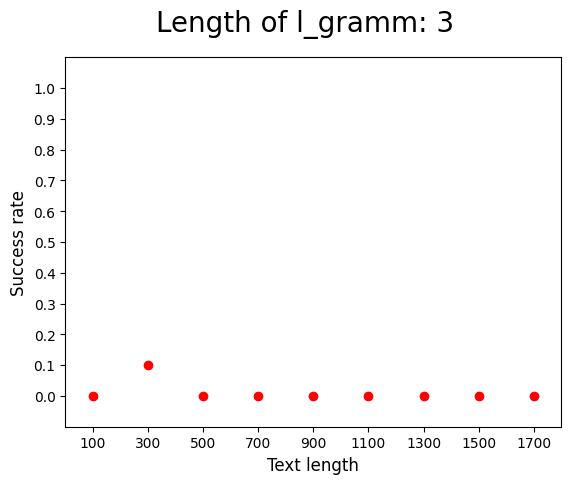

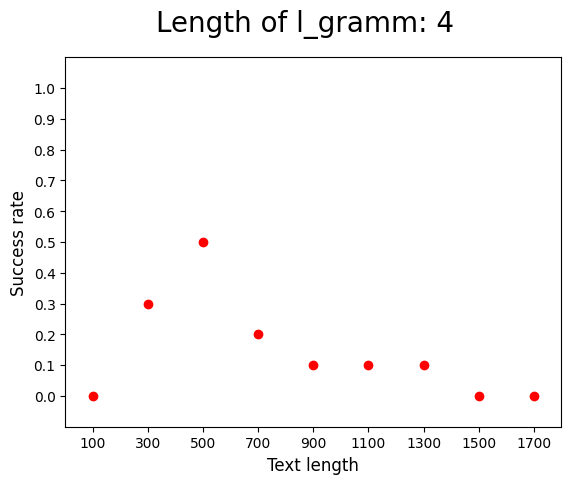

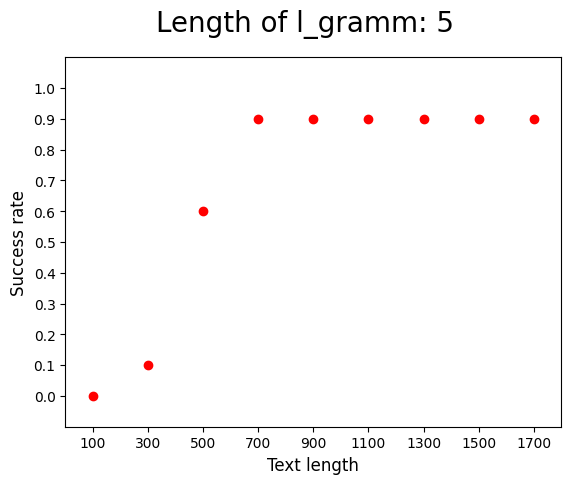

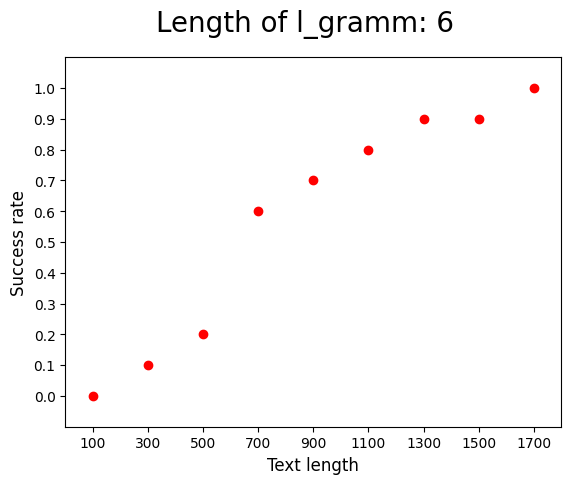

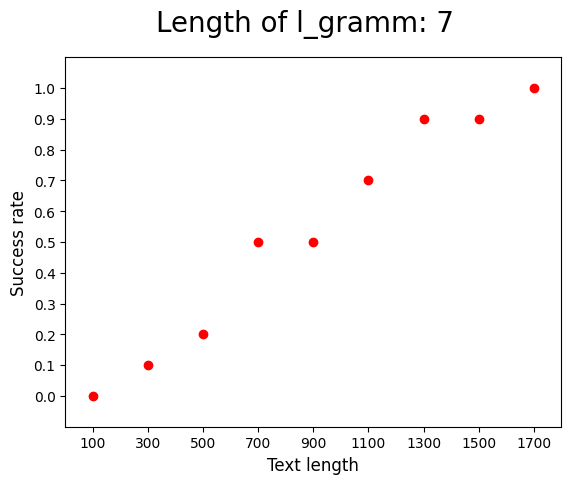

In [21]:
for l_gramm_length in text_length_coord:
    x = []
    y = []
    for x_text_length in text_length_coord[l_gramm_length]:
        x.append(x_text_length)
        y.append(text_length_coord[l_gramm_length][x_text_length])
    plt.suptitle('Length of l_gramm: ' + str(l_gramm_length), fontsize=20)
    plt.plot(x, y, 'ro')
    plt.xlabel('Text length', fontsize=12)
    plt.ylabel('Success rate', fontsize=12)
    plt.xticks(np.arange(min(text_length), max(text_length) + 200, 200))
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    plt.axis([0, text_length[8] + 100, -0.1, 1.1])
    plt.show()

# Success rate depending on keyword length

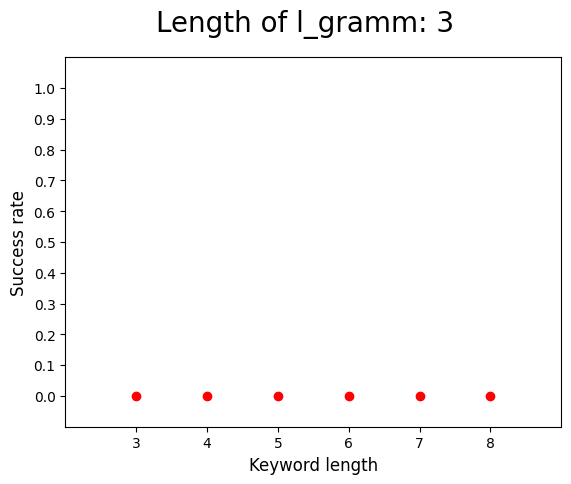

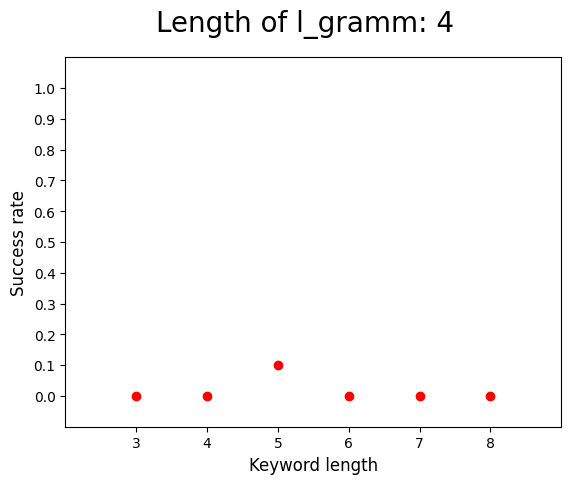

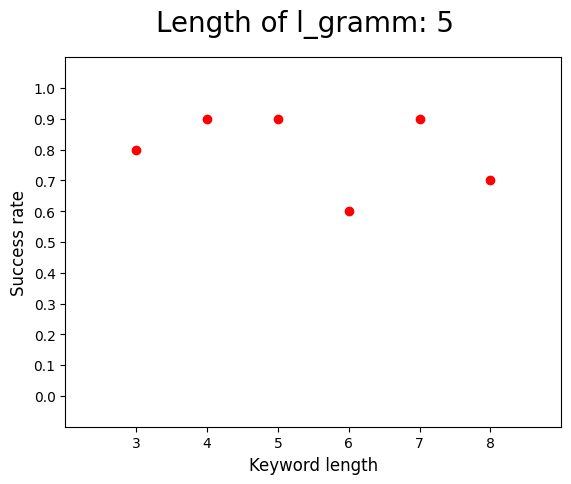

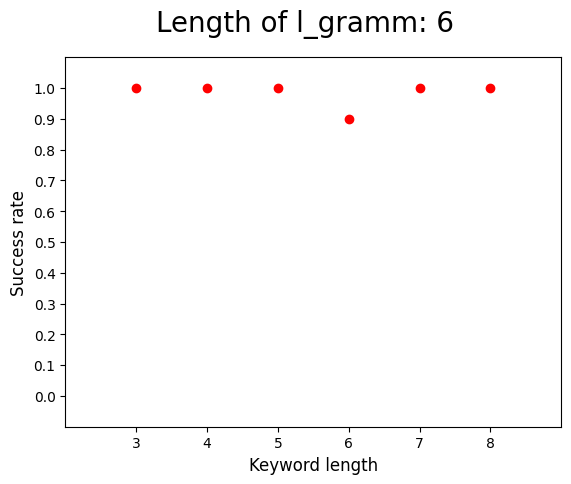

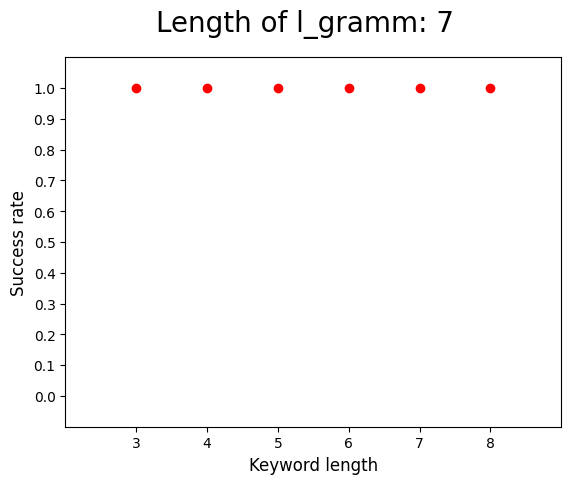

In [22]:
for l_gramm_length in key_word_coord:
    x = []
    y = []
    for x_key_word in key_word_coord[l_gramm_length]:
        x.append(x_key_word)
        y.append(key_word_coord[l_gramm_length][x_key_word])
    plt.suptitle('Length of l_gramm: ' + str(l_gramm_length), fontsize=20)
    plt.plot(x, y, 'ro')
    plt.xlabel('Keyword length', fontsize=12)
    plt.ylabel('Success rate', fontsize=12)
    plt.xticks(np.arange(len(key_words[0]), len(key_words[len(key_words)-1])+1, 1))
    plt.yticks(np.arange(0.0, 1.1, 0.1))
    plt.axis([len(key_words[0]) - 1, len(key_words[len(key_words) - 1]) + 1, -0.1, 1.1])
    plt.show()